#MÉTODOS NUMÉRICOS: SOLUCIÓN A PROBLEMAS

## PROBLEMA 1

### Polinomio de Taylor $P_4(x)$ de la función $f(x)=x\exp(x^2)$ alrededor de $x_0=0$

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
import sympy as sp

x = sp.symbols('x')
f = x*sp.exp(x**2)
f.series(x,0,4)

x + x**3 + O(x**4)

### Gráfica de $f(x)-P_4(x)$

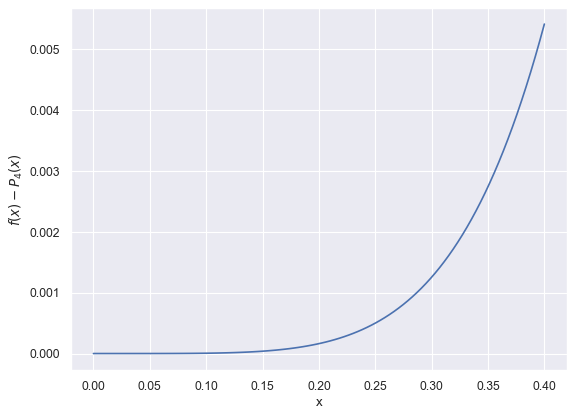

In [3]:
import numpy as np
from sympy.utilities.lambdify import lambdify

xaxis = np.linspace(0,0.4,100) 
f = lambdify(x,f)
p4 = x+x**3
p4 = lambdify(x,p4)

plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f(x)-p4(x) for x in xaxis])
plt.xlabel('x')
plt.ylabel('$f(x)-P_4(x)$')
plt.show()

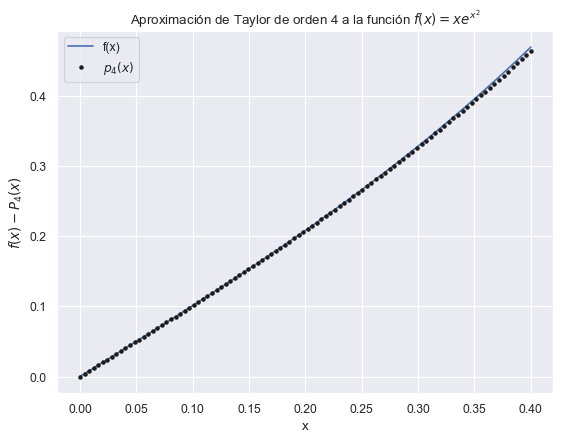

In [4]:
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f(x) for x in xaxis],label='f(x)')
plt.plot(xaxis,[p4(x) for x in xaxis],'k.',label='$p_4(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('$f(x)-P_4(x)$')
plt.title('Aproximación de Taylor de orden 4 a la función $f(x)=xe^{x^2}$')
plt.show()


### argmax regresa el índice del máximo valor de un arreglo
### La cota superior de $f(x)-P_4(x)$ es el máximo en el intevalo $[0,0.4]$

In [5]:
index = np.argmax(f(xaxis)-p4(xaxis))
print(f'Máximo.\nAbscisa: {xaxis[index]}, Ordenada: {f(xaxis[index])-p4(xaxis[index])}')


Máximo.
Abscisa: 0.4, Ordenada: 0.005404348396724101


### Integral aproximada

In [6]:
p4 = x+x**3
I_p4= sp.integrate(p4,(x,0,0.4))

In [7]:
f = x*sp.exp(x**2)
I_f = sp.integrate(f,(x,0,0.4))
error = abs((I_p4-I_f)/I_f)
print(f'La integral es {I_f}. La aproximada es {I_p4}. El error relativo es de {round(error,4)}')

La integral es 0.0867554354959051. La aproximada es 0.0864000000000000. El error relativo es de 0.0041


### Derivada aproximada

In [8]:
D_f = sp.diff(f).subs(x,0.2)
D_p4 = sp.diff(p4).subs(x,0.2)
print(f'Derivada real: {D_f}, aproximada: {D_p4}')

Derivada real: 1.12407563612778, aproximada: 1.12000000000000


In [9]:
error = (D_f-D_p4)/D_f
print(f'El error relativo en la derivada es de {round(error,4)}')


El error relativo en la derivada es de 0.0036


## PROBLEMA 2

### Supongamos que $(x_0,y_0)$ y $(x_1,y_1)$ se encuentran en una línea recta, descrita por $y=mx+b$, donde $m$ es la pendiente y $b$ la ordenada al origen. Sabemos que $m=\frac{y_1-y_0}{x_1-x_0}$. Por otro lado, $b=y-mx$, y ya que $(x_0,y_0)$ está en la línea, $b=y_0-mx_0$. De tal modo, encontramos la intersección de la línea con el eje $x$, (i.e. $y=0$), está dada por $x=-\frac{b}{m}=-\frac{y_0-mx_0}{m}=x_0-\frac{y_0}{m}$. Sustituyendo el valor de $m$, tenemos 
### $$x = x_0 -\frac{x_1-x_0}{y_1-y_0}y_0.$$
### Desarrollando esta expresión,
### $$x = \frac{x_0(y_1-y_0) -(x_1-x_0)y_0}{y_1-y_0}=\frac{x_0y_1-x_1y_0}{y_1-y_0}.$$

In [10]:
x0,y0 = 1.31,3.24
x1,y1 = 1.93,4.76

x = (x0*y1-x1*y0)/(y1-y0)
round(x,3)

-0.012

In [11]:
x = x0-(x1-x0)*y0/(y1-y0)
round(x,3)

-0.012

### Los dos métodos parecen dar resultados similares. Sin embargo, depende de cada caso; por ejemplo, si $x_0y_1$ es muy similar a $x_1y_0$, el primer método puede dar errores. Lo mismo sucede con el segundo método si $x_1$ es cercano a $x_0$.

## PROBLEMA 3

### Método de bisección para hallar raíces.

In [12]:
def bisection(f,a,b,tol=1E-5):
    n = 1
    condition = True
    while condition:
        c = (a+b)/2
        if (f(a)*f(c)<0):
            b = c
        else:
            a = c
        n += 1
        condition = abs(f(c))>tol
    return c,f(c),n

### Funciones

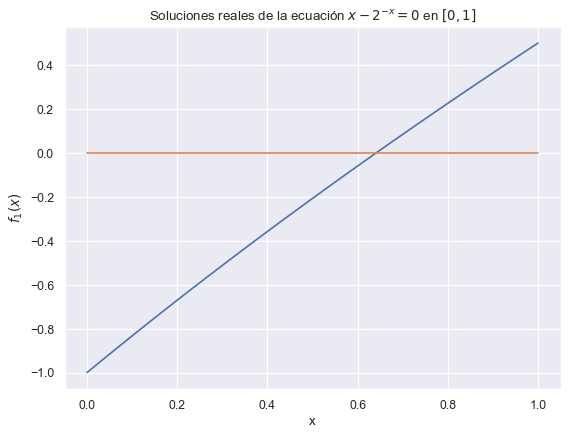

In [13]:
def f1(x):
    return x-2**(-x)

xaxis = np.linspace(0,1,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f1(x) for x in xaxis])
plt.plot(xaxis,[0 for x in xaxis])
plt.xlabel('x')
plt.ylabel('$f_1(x)$')
plt.title('Soluciones reales de la ecuación $x-2^{-x}=0$ en $[0,1]$')
plt.show()

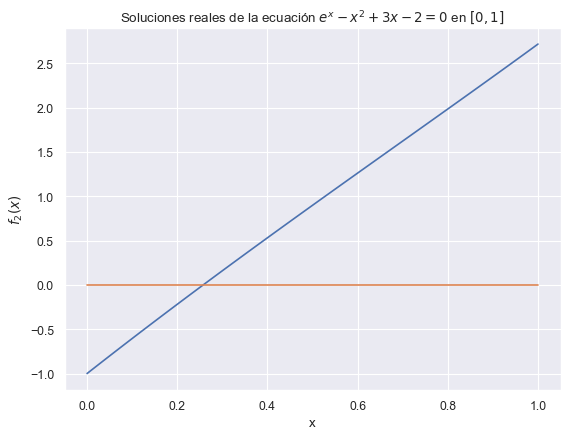

In [14]:
def f2(x):
    return np.exp(x)-x**2+3*x-2

xaxis = np.linspace(0,1,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f2(x) for x in xaxis])
plt.plot(xaxis,[0 for x in xaxis])
plt.xlabel('x')
plt.ylabel('$f_2(x)$')
plt.title('Soluciones reales de la ecuación $e^{x}-x^2+3x-2=0$ en $[0,1]$')
plt.show()

In [15]:
x1,fx1,n1 = bisection(f1,0,1)
print(f'La raíz de la función es {round(x1,3)}. Tomó {n1} iteraciones con una tolerancia de 1E-5.')


La raíz de la función es 0.641. Tomó 17 iteraciones con una tolerancia de 1E-5.


In [16]:
x2,fx2,n2 = bisection(f2,0,1)
print(f'La raíz de la función es {round(x2,3)}. Tomó {n2} iteraciones con una tolerancia de 1E-5.')

La raíz de la función es 0.258. Tomó 18 iteraciones con una tolerancia de 1E-5.


## PROBLEMA 4

### Método de punto fijo para hallar raíces.

In [17]:
def fixedpoint(f,g,p0,tol=1E-2):
    n = 1
    condition = True
    while condition:
        p1 = g(p0)
        p0 = p1
        n += 1
        condition = abs(f(p1))>tol
    return p0, f(p0), n

### Función

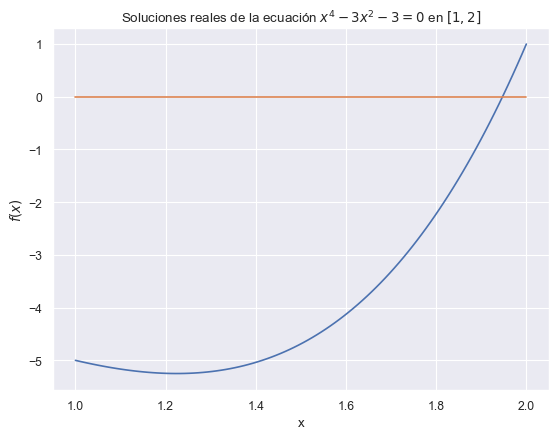

In [18]:
def f(x):
    return x**4-3*x**2-3

xaxis = np.linspace(1,2,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f(x) for x in xaxis])
plt.plot(xaxis,[0 for x in xaxis])
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title('Soluciones reales de la ecuación $x^4-3x^2-3=0$ en $[1,2]$')
plt.show()

### Tenemos que expresar $f(x)=0$ de la forma $x=g(x)$. Dos opciones son $$g_1(x)=\frac{3}{x}+\frac{3}{x^3},\qquad g_2(x)=\frac{x^3}{3}-\frac{1}{x}.$$
### Una tercera opción es notar que
### $$f(x)=x^4-3x^2-3=\left(x^2-\frac{3}{2} \right)^2-\frac{21}{4},$$
### de suerte que $x^2=\frac{3}{2}+\sqrt{\frac{21}{4}}$, o bien
### $$g_3(x)=\frac{3}{2x}+\sqrt{\frac{21}{4}}\frac{1}{x}.$$

In [19]:
def g1(x):
    return 3/x+3/(x**3)

def g2(x):
    return (x**3)/3-1/x

def g3(x):
    return 3/(2*x)+np.sqrt(21/4)*1/x

### Sin embargo, las dos primeras dan resultados divergentes y la tercera periódicos, por lo que debemos hallar otras formas

In [20]:
# fixedpoint(f,g1,1)
# fixedpoint(f,g2,1)
# fixedpoint(f,g3,1)

### Otras opciones son
### $$g_4(x)=\left(\frac{x^4}{3}-1 \right)^{1/2},\qquad g_5(x)=(3x^2+3)^{1/4}.$$

In [21]:
def g4(x):
    return ((x**4)/3-1)**(1/2)
    
def g5(x):
    return (3*x**2+3)**(1/4)

### La segunda función tiene problemas dado que involucra raíces cuadradas de números negativos, pero la segunda converge.

In [22]:
#fixedpoint(f,g4,1)
p0,fp0,n=fixedpoint(f,g5,1)
print(f'La raíz de la función es {round(p0,3)}. Tomó {n} iteraciones con una tolerancia de 1E-2.')


La raíz de la función es 1.947. Tomó 10 iteraciones con una tolerancia de 1E-2.


## PROBLEMA 5

### Sea $f(x)=x^2-6$, con $p_0=3$, $p_1=2$. Definimos métodos secante y de falsa posición

In [23]:
def falsePosition(a,b,f,tol=1E-4):
    n = 1
    condition = True
    while condition:
        c = a-(b-a)*f(a)/(f(b)-f(a))
        if (f(a)*f(c)<0):
            b = c
        else:
            a = c
        n += 1
        condition = abs(f(c))>tol
    return c, f(c), n

def secant(x1,x2,f,tol=1E-4):
    n = 1
    while (abs(f(x2)) > tol):
        df = (f(x2)-f(x1))/(x2-x1)
        h = f(x2)/df
        x1 = x2
        x2 = x2-h
        n += 1
    return x2, f(x2), n

In [24]:
def f(x):
    return x**2-6

In [25]:
p3,fp3,n = falsePosition(3,2,f)
print(f'La raíz de la función es {round(p3,3)}. Tomó {n} iteraciones con una tolerancia de 1E-4.')

error = abs((p3-np.sqrt(6))/np.sqrt(6))
print(f'La diferencia relativa con la raíz real es: {error}.')

La raíz de la función es 2.449. Tomó 6 iteraciones con una tolerancia de 1E-4.
La diferencia relativa con la raíz real es: 2.125626661150688e-06.


In [26]:
p3,fp3,n = secant(3,2,f)
print(f'La raíz de la función es {round(p3,3)}. Tomó {n} iteraciones con una tolerancia de 1E-4.')

error = abs((p3-np.sqrt(6))/np.sqrt(6))
print(f'La diferencia relativa con la raíz real es: {error}.')

La raíz de la función es 2.449. Tomó 5 iteraciones con una tolerancia de 1E-4.
La diferencia relativa con la raíz real es: 2.1692349584970954e-08.


### El método de secante necesita menos iteraciones y el error es menor.

## PROBLEMA 6

### Definimos el método de Newton-Rapshon.

In [27]:
def newtonRapshon(x,f,df,tol=1E-5):
    n = 1
    while (abs(f(x))>=tol):
        h = f(x)/df(x)
        x = x-h
        n += 1
    return x, f(x), n

### Este método requiere conocer la derivada analítica de la función. En este caso trabajaremos con
### $$e^{x}+2^{-x}+2\cos(x)-6=0,\qquad \ln(x-1)+\cos(x-1)=0,$$
### en los intervalos $[1,2]$ y $[1.3,2]$, respectivamente. Usamos sympy para obtener las (primeras y segundas) derivadas y convertimos las expresiones de sympy a funciones con lambdify.

In [28]:
from sympy.utilities.lambdify import lambdify

x = sp.symbols('x')
f1 = sp.exp(x)+2**(-x)+2*sp.cos(x)-6
df1 = sp.diff(f1,x)
d2f1 = sp.diff(df1,x)
f2 = sp.log(x-1)+sp.cos(x-1)
df2 = sp.diff(f2,x)
d2f2 = sp.diff(df2,x)

f1 = lambdify(x,f1)
df1 = lambdify(x,df1)
d2f1 = lambdify(x,d2f1)
f2 = lambdify(x,f2)
df2 = lambdify(x,df2)
d2f2 = lambdify(x,d2f2)

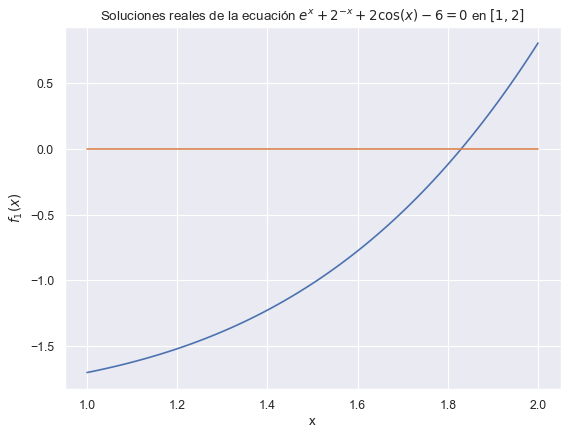

In [29]:
xaxis = np.linspace(1,2,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f1(x) for x in xaxis])
plt.plot(xaxis,[0 for x in xaxis])
plt.xlabel('x')
plt.ylabel('$f_1(x)$')
plt.title('Soluciones reales de la ecuación $e^{x}+2^{-x}+2\cos(x)-6=0$ en $[1,2]$')
plt.show()

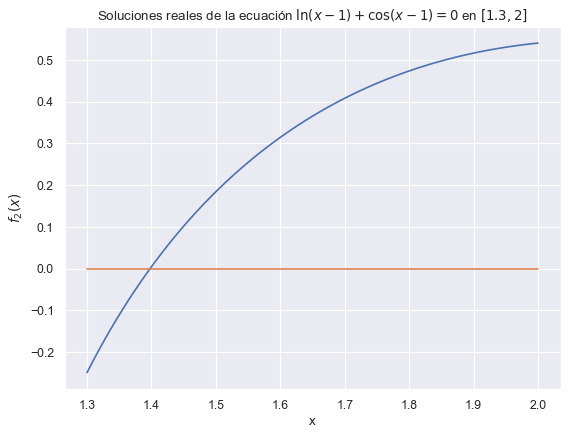

In [30]:
xaxis = np.linspace(1.3,2,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f2(x) for x in xaxis])
plt.plot(xaxis,[0 for x in xaxis])
plt.xlabel('x')
plt.ylabel('$f_2(x)$')
plt.title('Soluciones reales de la ecuación $\ln(x-1)+\cos(x-1)=0$ en $[1.3,2]$')
plt.show()

### Usamos Newton-Rapshon. Ya que queremos solución entre $[1,2]$ y $[1.3,2]$ respectivamente, nuestro valor inicial será 1.5 en ambas funciones

In [31]:
x,fx,n = newtonRapshon(1.5,f1,df1)
print(f'La raíz de la función es {round(x,3)}. Tomó {n} iteraciones con una tolerancia de 1E-5.')

La raíz de la función es 1.829. Tomó 5 iteraciones con una tolerancia de 1E-5.


In [32]:
x,fx,n = newtonRapshon(1.5,f2,df2)
print(f'La raíz de la función es {round(x,3)}. Tomó {n} iteraciones con una tolerancia de 1E-5.')

La raíz de la función es 1.398. Tomó 4 iteraciones con una tolerancia de 1E-5.


### Ahora definimos Newton-Raphson modificado, que requiere de la segunda derivada

In [33]:
def modifiedNewtonRapshon(x,f,df,df2,tol=1E-5):
    n = 1
    while (abs(f(x))>=tol):
        h = f(x)*df(x)/(df(x)**2-f(x)*df2(x))
        x = x-h
        n += 1
    return x, f(x), n

In [34]:
x,fx,n = modifiedNewtonRapshon(1.5,f1,df1,d2f1)
print(f'La raíz de la función es {round(x,3)}. Tomó {n} iteraciones con una tolerancia de 1E-5.')

La raíz de la función es 1.829. Tomó 5 iteraciones con una tolerancia de 1E-5.


In [35]:
x,fx,n = modifiedNewtonRapshon(1.5,f2,df2,d2f2)
print(f'La raíz de la función es {round(x,3)}. Tomó {n} iteraciones con una tolerancia de 1E-5.')

La raíz de la función es 1.398. Tomó 4 iteraciones con una tolerancia de 1E-5.


## PROBLEMA 7

### Ya hemos definido los métodos de Newton-Rapshon. Ahora definimos el de Muller, que tiene la ventaja de que permite hallar soluciones complejas.

In [36]:
import cmath 
def muller(x0,x1,x2,f,tol= 1E-4):
    n = 1
    while (abs(f(x2))>=tol):
        f0,f1,f2=f(x0),f(x1),f(x2)
        d1 = f0-f2
        d2 = f1-f2
        h1 = x0-x2
        h2 = x1-x2
        c = f2
        b = (d2*h1**2-d1*h2**2)/(h1*h2*(h1-h2))
        a = (d1*h2-d2*h1)/(h1*h2*(h1-h2))

        x = (-2*c)/(b+cmath.sqrt(b**2-4*a*c))
        y = (-2*c)/(b-cmath.sqrt(b**2-4*a*c))

        if (np.abs(x)>=np.abs(y)):
            sol = x+x2
        else:
            sol = y+x2
        x0 = x1
        x1 = x2
        x2 = sol
        n += 1
    #r, i = x2.real, x2.imag
    return x2, f(x2), n

### Trabajaremos con las funciones
### $$f_1(x)=x^3-2x^2-5,\qquad f_2(x)=x^3+4.001x^2+4.002x+1.101.$$

### Primeras y segundas derivadas:

In [37]:
from sympy.utilities.lambdify import lambdify

x = sp.symbols('x')
f1 = x**3-2*x**2-5
df1 = sp.diff(f1,x)
d2f1 = sp.diff(df1,x)
f2 = x**3+4.001*x**2+4.002*x+1.101
df2 = sp.diff(f2,x)
d2f2 = sp.diff(df2,x)

f1 = lambdify(x,f1)
df1 = lambdify(x,df1)
d2f1 = lambdify(x,d2f1)
f2 = lambdify(x,f2)
df2 = lambdify(x,df2)
d2f2 = lambdify(x,d2f2)

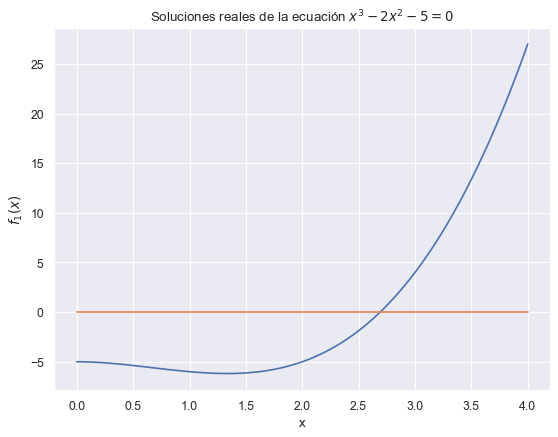

In [38]:
xaxis = np.linspace(0,4,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f1(x) for x in xaxis])
plt.plot(xaxis,[0 for x in xaxis])
plt.xlabel('x')
plt.ylabel('$f_1(x)$')
plt.title('Soluciones reales de la ecuación $x^3-2x^2-5=0$')
plt.show()

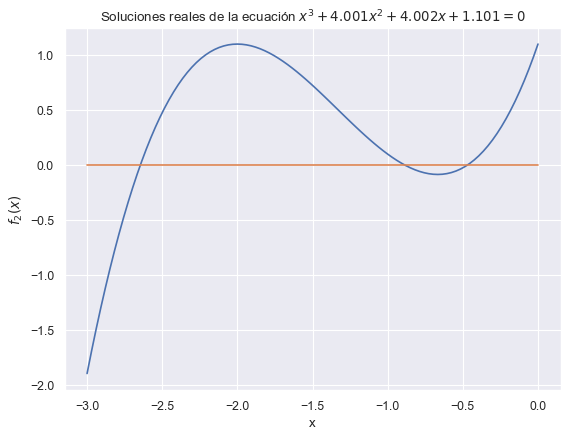

In [39]:
xaxis = np.linspace(-3,0,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f2(x) for x in xaxis])
plt.plot(xaxis,[0 for x in xaxis])
plt.xlabel('x')
plt.ylabel('$f_2(x)$')
plt.title('Soluciones reales de la ecuación $x^3+4.001x^2+4.002x+1.101=0$')
plt.show()

### La primera función tiene una única raíz real, por lo que los métodos de Newton-Rapshon están restringidos a esta solución

In [40]:
x,fx,n = newtonRapshon(1,f1,df1,1E-4)
print(f'La raíz de la función es {round(x,3)}. Tomó {n} iteraciones con una tolerancia de 1E-4.')

La raíz de la función es 2.691. Tomó 22 iteraciones con una tolerancia de 1E-4.


In [41]:
x,fx,n = modifiedNewtonRapshon(1,f1,df1,d2f1,1E-4)
print(f'La raíz de la función es {round(x,3)}. Tomó {n} iteraciones con una tolerancia de 1E-4.')

La raíz de la función es 2.691. Tomó 7 iteraciones con una tolerancia de 1E-4.


### Con Muller hallamos una raíz compleja

In [42]:
x,fx,n = muller(-1,0,1,f1)
print(f'La raíz de la función es {round(x.real,3)}+{round(x.imag,3)}i. Tomó {n} iteraciones con una tolerancia de 1E-4.')

La raíz de la función es -0.345+1.319i. Tomó 152 iteraciones con una tolerancia de 1E-4.


### Habiendo encontrado una de las raíces complejas, sabemos que la otra raíz es la conjugada de ella. Ahora nos enfocamos en la segunda función:

In [43]:
from random import randrange

solutions = []
# Asumiendo que las tres soluciones son reales y pueden ser encontradas por este método,
while len(solutions)<3:
    r1 = randrange(-10,10)
    x,fx,n = newtonRapshon(r1,f2,df2,1E-4)
    x = round(x,3)
    if x not in solutions:
        solutions.append(x)
        
print(f'El conjunto solución es {solutions}.')

El conjunto solución es [-2.646, -0.47, -0.885].


In [44]:
solutions = []
# Asumiendo que las tres soluciones son reales y pueden ser encontradas por este método,
while len(solutions)<3:
    r1 = randrange(-10,10)
    x,fx,n = modifiedNewtonRapshon(r1,f2,df2,d2f2,1E-4)
    x = round(x,3)
    if x not in solutions:
        solutions.append(x)
        
print(f'El conjunto solución es {solutions}.')

El conjunto solución es [-0.885, -2.646, -0.47].


### Las tres soluciones son reales, y fuimos capaces de encontrarlas con los métodos de Newton. Muller no es capaz de encontrar las tres soluciones de la función $f_2(x)$. Sólo encuentra dos: $-0.885$, y $-0.47.$

In [45]:
# solutions = []
# # Asumiendo que las tres soluciones son reales y pueden ser encontradas por este método,
# while len(solutions)<3:
#     r1,r2,r3 = randrange(-10,10), randrange(-10,10), randrange(-10,10)
#     x,fx,n = muller(r1,r2,r3,f2)
#     # Asumiendo que las raíces son reales, redondeamos
#     x = round(x.real,3)
#     if x not in solutions:
#         solutions.append(x)

# print(f'El conjunto solución es {solutions}.')

## PROBLEMA 8

### Definimos
### $$f_1(x)=\ln(x+1),\qquad f_2(x)=\tan(x).$$
### $x_0=0$, $x_1=0.6$, $x_2=0.9$. Interpolaremos para construir polinomios de grado 1 y 2.
### Comenzamos con $f_1(x)$.

In [46]:
from scipy.interpolate import interp1d

x = np.array([0.0,0.6,0.9])
y = np.log(x+1)
f1 = interp1d(x,y,kind='linear')
f2 = interp1d(x,y,kind='quadratic')

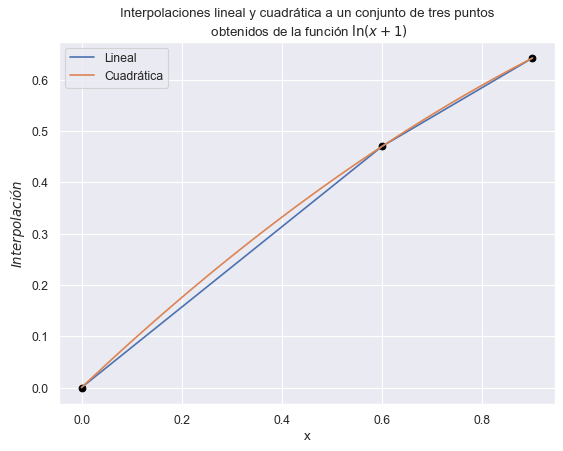

In [47]:
xaxis = np.linspace(0,0.9,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f1(x) for x in xaxis],label='Lineal')
plt.plot(xaxis,[f2(x) for x in xaxis],label='Cuadrática')
plt.scatter(x,y,c='black')
plt.xlabel('x')
plt.ylabel('$Interpolación$')
plt.legend()
plt.title('Interpolaciones lineal y cuadrática a un conjunto de tres puntos\n obtenidos de la función $\ln(x+1)$')
plt.show()

### ¿Qué tan buenas son las interpolaciones en $x=0.45$? La cuadrática es mejor, lo que se ve reflejado en la magnitud del error relativo.

In [48]:
error1 = abs((f1(0.45)-np.log(0.45+1))/np.log(0.45+1))
print(f'La interpolación lineal indica que f1(0.45)={f1(0.45)}\n Valor real: {np.log(0.45+1)}, Error: {error1}.')
error2 = abs((f2(0.45)-np.log(0.45+1))/np.log(0.45+1))
print(f'La interpolación cuadrática indica que f2(0.45)={f2(0.45)}\n Valor real: {np.log(0.45+1)}, Error: {error2}.')

La interpolación lineal indica que f1(0.45)=0.35250272193430177
 Valor real: 0.371563556432483, Error: 0.051298988203233.
La interpolación cuadrática indica que f2(0.45)=0.36829061135835395
 Valor real: 0.371563556432483, Error: 0.008808573977366889.


### Para $f_2(x)$ tenemos

In [49]:
x = np.array([0.0,0.6,0.9])
y = np.tan(x)
f1 = interp1d(x,y,kind='linear')
f2 = interp1d(x,y,kind='quadratic')

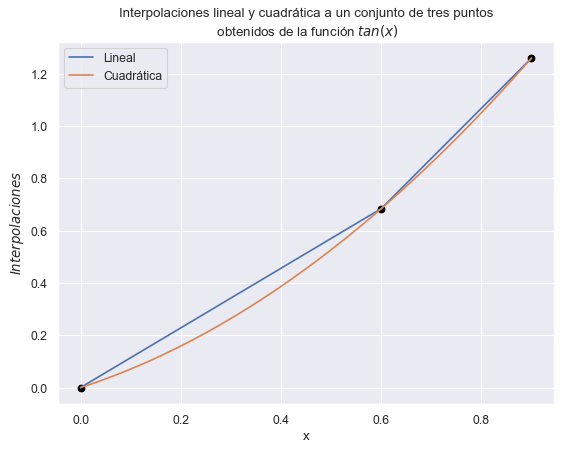

In [50]:
xaxis = np.linspace(0,0.9,100)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[f1(x) for x in xaxis],label='Lineal')
plt.plot(xaxis,[f2(x) for x in xaxis],label='Cuadrática')
plt.scatter(x,y,c='black')
plt.xlabel('x')
plt.ylabel('$Interpolaciones$')
plt.legend()
plt.title('Interpolaciones lineal y cuadrática a un conjunto de tres puntos\n obtenidos de la función $tan(x)$')
plt.show()

### ¿Qué tan buenas son las interpolaciones en $x=0.45$? La cuadrática es mejor, lo que se ve reflejado en la magnitud del error relativo.

In [51]:
error1 = abs((f1(0.45)-np.tan(0.45))/np.tan(0.45))
print(f'La interpolación lineal indica que f1(0.45)={f1(0.45)}\n Valor real: {np.log(0.45+1)}, Error: {error1}.')
error2 = abs((f2(0.45)-np.tan(0.45))/np.tan(0.45))
print(f'La interpolación cuadrática indica que f2(0.45)={f2(0.45)}\n Valor real: {np.log(0.45+1)}, Error: {error2}.')

La interpolación lineal indica que f1(0.45)=0.5131026062562694
 Valor real: 0.371563556432483, Error: 0.06220313744425356.
La interpolación cuadrática indica que f2(0.45)=0.4546143549968191
 Valor real: 0.371563556432483, Error: 0.058876746450132245.


## PROBLEMA 9

### $$f_1(x)=x\ln(x)$$

In [52]:
from scipy.interpolate import CubicSpline

def f1(x):
    return x*np.log(x)
def df1(x):
    return np.log(x)+1

x = np.array([8.3,8.6])
y = f1(x)
p1 = CubicSpline(x,y)


### Evaluamos la precisión de la interpolación en $x=8.4$

In [53]:
err1 = abs((f1(8.4)-p1(8.4))/f1(8.4))

h = 1E-5
der = (p1(8.4+h)-p1(8.4))/h
err2 = abs((df1(8.4)-der)/df1(8.4))

print(f'La función evaluada en x=8.4 es {f1(8.4)}. La aproximación con cubic splines es {p1(8.4)}. El error es {err1}.')
print(f'La derivada evaluada en x=8.4 es {df1(8.4)}. La aproximación con cubic splines es {der}. El error es {err2}.')

La función evaluada en x=8.4 es 17.87714632913385. La aproximación con cubic splines es 17.87833216458458. El error es 6.633247996621503e-05.
La derivada evaluada en x=8.4 es 3.128231705849268. La aproximación con cubic splines es 3.1341139170137917. El error es 0.0018803630030106346.


### $$f_2(x)=x\cos(x)-2x^2+3x-1$$

In [54]:
def f2(x):
    return x*np.cos(x)-2*x**2+3*x-1
def df2(x):
    return -4*x-x*np.sin(x)+np.cos(x)+3

x = np.array([0.1,0.2,0.3,0.4])
y = f2(x)
p2 = CubicSpline(x,y)

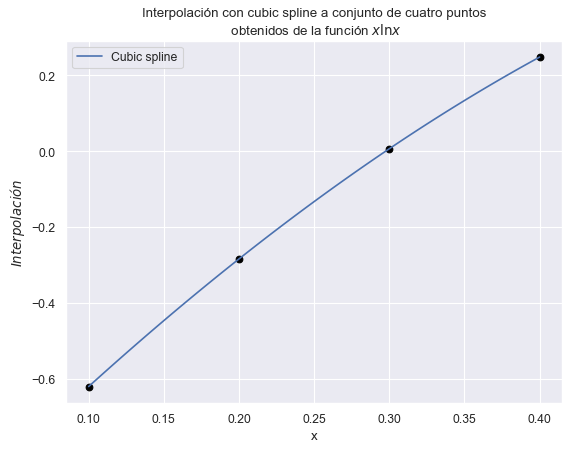

In [55]:
xaxis = np.linspace(0.1,0.4,100)

plt.figure(figsize=(8,6),dpi=80)
plt.plot(xaxis,[p2(x) for x in xaxis],label='Cubic spline')
plt.scatter(x,y,c='black')
plt.xlabel('x')
plt.ylabel('$Interpolación$')
plt.legend()
plt.title('Interpolación con cubic spline a conjunto de cuatro puntos\n obtenidos de la función $x\ln x$')
plt.show()

### Evaluamos la precisión de la interpolación en $x=0.25$

In [56]:
err1 = abs((f2(0.25)-p2(0.25))/f1(0.25))

h = 1E-5
der = (p2(0.25+h)-p2(0.25))/h
err2 = abs((df2(0.25)-der)/df2(0.25))

print(f'La función evaluada en x=8.4 es {f2(0.25)}. La aproximación con cubic splines es {p2(0.25)}. El error es {err1}.')
print(f'La derivada evaluada en x=8.4 es {df2(0.25)}. La aproximación con cubic splines es {der}. El error es {err2}.')

La función evaluada en x=8.4 es -0.13277189457233884. La aproximación con cubic splines es -0.13277477833597412. El error es 8.320782991414935e-06.
La derivada evaluada en x=8.4 es 2.907061431897014. La aproximación con cubic splines es 2.9070355194699133. El error es 8.913615246023083e-06.


## Problema 10

### Aproximación a la derivada: forward y backward
### $$f_1(x)=\tan(x)$$

In [57]:
import pandas as pd

# Para backward h -> -h
def derivative(f,x,h=1E-5):
    return (f(x+h)-f(x))/h

In [58]:
def f1(x):
    return np.tan(x)
def df1(x):
    return 1/np.cos(x)**2

x = np.arange(2.1,2.61,0.1)
df = pd.DataFrame()
df['Función'] = f1(x)
df['Forward'] = derivative(f1,x)
df['Err Forward'] = abs((df1(x)-df['Forward'])/df1(x))
df['Backward'] = derivative(f1,x,-1E-5)
df['Err Backward'] = abs((df1(x)-df['Backward'])/df1(x))
df.index = x
df.index.name = 'Valores'
df

,Función,Forward,Err Forward,Backward,Err Backward
Valores,,,,,
2.1,-1.709847,3.923508,0.000017,3.923642,0.000017
2.2,-1.373823,2.887350,0.000014,2.887429,0.000014
2.3,-1.119214,2.252614,0.000011,2.252664,0.000011
2.4,-0.916014,1.839065,0.000009,1.839099,0.000009
2.5,-0.747022,1.558031,0.000007,1.558054,0.000007
2.6,-0.601597,1.361910,0.000006,1.361927,0.000006


In [59]:
def f2(x):
    return np.exp(x/3)+x**2
def df2(x):
    return 2*x+np.exp(x/3)/3

x = np.arange(-3.0,-1.9,0.2)
df = pd.DataFrame()
df['Función'] = f2(x)
df['Forward'] = derivative(f2,x)
df['Err Forward'] = abs((df2(x)-df['Forward'])/df2(x))
df['Backward'] = derivative(f2,x,-1E-5)
df['Err Backward'] = abs((df2(x)-df['Backward'])/df2(x))
df.index = x
df.index.name = 'Valores'
df

,Función,Forward,Err Forward,Backward,Err Backward
Valores,,,,,
-3.0,9.367879,-5.877363,0.000002,-5.877384,0.000002
-2.8,8.233241,-5.468910,0.000002,-5.468930,0.000002
-2.6,7.180350,-5.059873,0.000002,-5.059893,0.000002
-2.4,6.209329,-4.650213,0.000002,-4.650234,0.000002
-2.2,5.320305,-4.239888,0.000002,-4.239908,0.000002
-2.0,4.513417,-3.828851,0.000003,-3.828871,0.000003


## PROBLEMA 11

### Vamos a calcular las integrales
### $$\int_0^{0.35}\frac{2}{x^2-4}dx,\qquad \int_0^{\pi/2}e^{3x}\sin(2x)dx$$
### usando la regla del trapezoide, de Simpson y midpoint. Para ello escribimos el siguiente código

In [60]:
def midpoint(f,x0,xn,n):
    h = (xn - x0) / n
    integration = 0
    x_int = ((2*n+1)*x0-xn)/(2*n)
    for k in range(1,n+1):
        x = x_int + (k*h)
        integration += h*f(x)
    return integration

def trapezoidal(f,x0,xn,n):
    h = (xn - x0) / n
    # Finding sum 
    integration = f(x0) + f(xn)
    for i in range(1,n):
        k = x0 + i*h
        integration = integration + 2 * f(k)
    # Finding final integration value
    integration = integration * h/2
    return integration

def simpson13(f,x0,xn,n):
    # calculating step size
    h = (xn - x0) / n
    # Finding sum 
    integration = f(x0) + f(xn)
    for i in range(1,n):
        k = x0 + i*h
        if i%2 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 4 * f(k)
    # Finding final integration value
    integration = integration * h/3
    return integration

### Ahora definimos las funciones a integrar

In [61]:
def f1(x):
    return 2/(x**2-4)

x = sp.symbols('x')
# Integral analítica
I = sp.integrate(f1(x),(x,0,0.35))
# Integrales aproximadas
I1 = midpoint(f1,0,0.35,20)
I2 = trapezoidal(f1,0,0.35,20)
I3 = simpson13(f1,0,0.35,20)

err1 = abs((I1-I)/I)
err2 = abs((I2-I)/I)
err3 = abs((I3-I)/I)

print(f"""La integral es {I}.
Midpoint: {I1}, error: {err1},
Trapezoidal: {I1}, error: {err2},
Simpson: {I1}, error: {err3}""")

La integral es -0.176820020121789.
Midpoint: -0.17681883195744585, error: 0.00000671962565403611,
Trapezoidal: -0.17681883195744585, error: 0.0000134394205765658,
Simpson: -0.17681883195744585, error: 9.02559196189889E-10


In [62]:
def f2(x):
    return sp.exp(3*x)*sp.sin(2*x)

x = sp.symbols('x')
# Integral analítica
I = sp.integrate(f2(x),(x,0,np.pi/2))
# Integrales aproximadas
I1 = midpoint(f2,0,np.pi/2,20)
I2 = trapezoidal(f2,0,np.pi/2,20)
I3 = simpson13(f2,0,np.pi/2,20)

err1 = abs((I1-I)/I)
err2 = abs((I2-I)/I)
err3 = abs((I3-I)/I)

print(f"""La integral es {I}.
Midpoint: {I1}, error: {err1},
Trapezoidal: {I1}, error: {err2},
Simpson: {I1}, error: {err3}""")

La integral es 17.2796582292086.
Midpoint: 17.3371554630109, error: 0.00332745202709100,
Trapezoidal: 17.3371554630109, error: 0.00666674935606542,
Simpson: 17.3371554630109, error: 0.0000630786372565662


## PROBLEMA 12

### Conocemos los valores de una función en ciertos puntos:
### $$f(1.8)=3.12014, \quad f(2.0)=4.42569,\quad f(2.2)=6.04241,\quad f(2.4)=8.03014,\quad f(2.6)=10.46675.$$
### Queremos conocer $\int_{1.8}^{2.6}f(x)dx$. Hay varias formas de hacer esto, por ejemplo, con el método del trapezoide.

In [63]:
x = np.arange(1.8,2.7,0.2)
fx = np.array([3.12014,4.42569,6.04241,8.03014,10.46675])

N = len(x)
h = 0.2

S = 0
for k in range(1,N):
    # A cada paso sumamos: base (h) por altura 0.5*(fx[k-1]+fx[k])
    # (La altura es el valor medio)
    S += h*0.5*(fx[k-1]+fx[k])

print(f'Con método del trapezoide, llegamos a que la integral vale aproximadamente {S}.')

Con método del trapezoide, llegamos a que la integral vale aproximadamente 5.058337.


### Ahora calculamos usando trapz de numpy para comparar

In [64]:
np.trapz(fx,x)

5.058336999999997

## PROBLEM 13

### Vamos a determinar los valores de $n$ y $h$ requeridos para aproximar la integral
### $$\int_0^{2}e^{2x}\sin(3x)dx$$
### con precisión de $10^{-4}$ usando trapezoidal, Simpson y midpoint. Primero calculamos la integral analítica.

In [65]:
def f(x):
    return np.exp(2*x)*np.sin(3*x)

x = sp.symbols('x')
I = sp.integrate(sp.exp(2*x)*sp.sin(3*x),(x,0,2))
I

-3*exp(4)*cos(6)/13 + 2*exp(4)*sin(6)/13 + 3/13

### Definimos función que toma un método de integración y ajusta el parámetro $n$ hasta que la integral se aproxima a su valor real con cierta tolerancia:

In [66]:
I = float(I)
def integration_tol(method,f,x0,xn,tol=1E-4):
    n = 1
    # integramos con un método, una sola división
    integration = method(f,x0,xn,n)
    # si la diferencia relativa es mayor que la tolerancia
    # agregamos una división y volvemos a calcular la integral
    while abs((I-integration)/I)>tol:
        n += 1
        integration = method(f,x0,xn,n)
    h = (xn-x0)/n
    return integration,n,h,abs((I-integration)/I)

In [67]:
I1,n1,h1,err1 = integration_tol(midpoint,f,0,2)
I2,n2,h2,err2 = integration_tol(trapezoidal,f,0,2)
I3,n3,h3,err3 = integration_tol(simpson13,f,0,2)

print(f"""Integral: {I}.
Midpoint: {I1}, n: {n1}, h: {h1}, error: {err1},
Trapezoidal: {I2}, n: {n2}, h: {h2}, error: {err2},
Simpson: {I3}, n: {n3}, h: {h3}, error: {err3}.""")

Integral: -14.213977129862522.
Midpoint: -14.215385846751197, n: 121, h: 0.01652892561983471, error: 9.910786233887113e-05,
Trapezoidal: -14.21256636221692, n: 171, h: 0.011695906432748537, error: 9.925213982778877e-05,
Simpson: -14.212950305830326, n: 18, h: 0.1111111111111111, error: 7.224044493777815e-05.


## PROBLEMA 14

### Se puede demostrar que el error en la i-ésima iteración de Simpson está dado por $\epsilon_i=\frac{1}{15}(I_i-I_{i-1}).$ Definimos
### $$S_i=\frac{1}{3}\left[f(a)+f(b)+2\sum_{k \text{ pares}} f(a+kh_i) \right],$$ $$T_i=\frac{2}{3}\sum_{k \text{ impares}}f(a+kh_i).$$
### Esto está motivado por el hecho de que $$I_i=\frac{1}{2}I_{i-1}+h_i\sum_{k \text{ impares}}f(a+kh_i).$$
### Y notando que $S_i= S_{i-1}+T_{i-1}$, con lo que $$I_i=h_i(S_i+2T_i).$$

In [68]:
# ADAPTIVE SIMPSON'S METHOD
def simpson_adaptive(f,a,b,n):
    N = 2**(n-1)
    h = (b-a)/N #tamaño de las divisiones
    def t(n):        
        N = 2**(n-1)
        h = (b-a)/N #tamaño de las divisiones
        t = 0
        for k in range(1,N,2):
            t += 2/3*f(a+k*h)
        return t
    def s(n):
        if n == 1:
            return 1/3*(f(a) + f(b))
        else:
            return s(n-1) + t(n-1)
    return h*(s(n)+2*t(n))

In [69]:
def f(x):
    return 4*x*np.cos(2*x)-(x-2)**2

epsilon = 1
n = 1
I =  simpson_adaptive(f,0,5,n)
while (epsilon>1E-5):
    I0 = I
    n += 1
    I = simpson_adaptive(f,0,5,n)
    epsilon = abs(1/15*(I-I0))

print(f'La integral es {I}, error: {epsilon}, divisiones: {2**(n-1)}')

La integral es -18.945949013325205, error: 4.0994235774860497e-07, divisiones: 64


## PROBLEMA 15

### Supongamos que nos dan un conjunto no uniforme de N puntos $x_k$ y queremos integrar $f(x)$ de $a$ a $b$ dados los valores $f(x_k)$. Escogemos un polinomio de la forma $$\phi_k(x)=\Pi_{m=1...N,m\neq k}\frac{(x-x_m)}{x_k-x_m}.$$
### Al evaluar este polinomio en $x=x_m$ tenemos $\phi_k(x_m)=1$ si $m=k$ y 0 en otro caso, i.e. $\phi_k(x_m)=\delta_{km}$. Ahora bien, si definimos $\Phi(x)=\sum_{k=1}^Nf(x_k)\phi_k(x)$, entonces $\Phi(x_m)=f(x_m)$. $\Phi(x)$ es un polinomio de grado $N-1$ que ajusta el integrando $f(x)$ a todos los puntos de la muestra. Para aproximar la integral usamos
### $$\int_a^bf(x)dx\approx \int_a^b\Phi(x)dx=\sum_{k=1}^Nf(x_k)\int_a^b\phi_k(x)dx.$$
### Definimos los pesos $\omega_k=\sum_a^b\phi_k(x)dx$. Una vez que éstos se conocen, la integral es trivial. Es posible mapear los pesos y puntos a otro dominio, sin tener que recalcularlos. Típicamente se calcula $$\omega_k=\int_{-1}^1\phi_k(x)dx.$$ 
### (El mapeo se define en el código de abajo.) Para tener una regla de integración lo más precisa posible, escogemos los pesos como los ceros del N-ésimo polinomio de Legendre: esto es la cuadratura gaussiana. En el archivo gaussxw se encuentra una función que regresa los pesos dado N.

In [70]:
from gaussxw import gaussxw

def gauss_quad(f,a,b,n):
    # Calculamos puntos muestra y pesos, luego los mapeamos al dominio requerido
    x,w = gaussxw(n)
    xp = 0.5*(b-a)*x+0.5*(b+a)
    wp = 0.5*(b-a)*w
    # Integración
    s = 0.0
    for k in range(n):
        s += wp[k]*f(xp[k])
    return s

### Para la función $\frac{x}{\sqrt{x^2-4}}$ tenemos

In [71]:
def f1(x):
    return x/np.sqrt(x**2-4)

x = sp.symbols('x')
# Integral analítica
I = float(sp.integrate(x/sp.sqrt(x**2-4),(x,3,3.5)))
# Cuadratura gaussiana con n = 2
I0 = gauss_quad(f1,3.0,3.5,2)
err = abs((I-I0)/I)

print(f"""La integral analítica es {I}.
Con cuadratura gaussiana la integral es {I0}, error: {err}""")

La integral analítica es 0.6362133457692246.
Con cuadratura gaussiana la integral es 0.6361965649627969, error: 2.6376067932782527e-05


### Asimismo, para la función $x^2e^{-x}$ queda

In [72]:
def f1(x):
    return x**2*np.exp(-x)

x = sp.symbols('x')
# Integral analítica
I = float(sp.integrate(x**2*sp.exp(-x),(x,0,1)))
# Cuadratura gaussiana con n = 2
I0 = gauss_quad(f1,0,1,2)
err = abs((I-I0)/I)

print(f"""La integral analítica es {I}.
Con cuadratura gaussiana la integral es {I0}, error: {err}""")

La integral analítica es 0.16060279414278839.
Con cuadratura gaussiana la integral es 0.1594104309663793, error: 0.007424299077567604


## PROBLEMA 16

### Vamos a calcular las integrales dobles $$\int_{2.1}^{2.5}\int_{1.2}^{1.4}xy^2 dydx, \quad \int_{1}^{1.5}\int_{0}^x(x^2+\sqrt{x})dydx.$$ Notamos que la primera la podemos escribir como $$\int_{2.1}^{2.5}xdx \int_{1.2}^{1.4}y^2dy.$$

In [73]:
# Integral analítica
I = 0.311573
# Integrales aproximadas
I1 = midpoint(lambda x:x,2.1,2.5,10)*midpoint(lambda y:y**2,1.2,1.4,10)
I2 = trapezoidal(lambda x:x,2.1,2.5,10)*trapezoidal(lambda y:y**2,1.2,1.4,10)
I3 = simpson13(lambda x:x,2.1,2.5,10)*simpson13(lambda y:y**2,1.2,1.4,10)
I4 = gauss_quad(lambda x:x,2.1,2.5,10)*gauss_quad(lambda y:y**2,1.2,1.4,10)
# Errores
e1 = abs((I-I1)/I)
e2 = abs((I-I2)/I)
e3 = abs((I-I3)/I)
e4 = abs((I-I4)/I)

print(f"""Integral: {I},
Midpoint: {I1}, error: {e1},
Trapezoidal: {I2}, error: {e2},
Simpson: {I3}, error: {e3},
Gaussian: {I4}, error: {e4}.""")

Integral: 0.311573,
Midpoint: 0.3115671999999999, error: 1.861522018952628e-05,
Trapezoidal: 0.31158559999999985, error: 4.0439961100168245e-05,
Simpson: 0.31157333333333326, error: 1.0698402405500596e-06,
Gaussian: 0.3115733333333334, error: 1.0698402410845522e-06.


### La segunda integral también se puede separar trivialmente: $$\int_{1}^{1.5}\left(\int_0^x  dy \right)(x^2+\sqrt{x})dx=\int_1^{1.5}(x^3+x\sqrt{x})dx.$$

In [74]:
# Integral analítica
x = sp.symbols('x')
sp.integrate(x**3+x*sp.sqrt(x),x)

2*x**(5/2)/5 + x**4/4

In [75]:
I = sp.integrate(x**3+x*sp.sqrt(x),(x,1,1.5))

In [76]:
# Integrales aproximadas
I1 = midpoint(lambda x:x**3+x*np.sqrt(x),1,1.5,10)
I2 = trapezoidal(lambda x:x**3+x*np.sqrt(x),1,1.5,10)
I3 = simpson13(lambda x:x**3+x*np.sqrt(x),1,1.5,10)
I4 = gauss_quad(lambda x:x**3+x*np.sqrt(x),1,1.5,10)
# Errores
e1 = abs((I-I1)/I)
e2 = abs((I-I2)/I)
e3 = abs((I-I3)/I)
e4 = abs((I-I4)/I)

print(f"""Integral: {I},
Midpoint: {I1}, error: {e1},
Trapezoidal: {I2}, error: {e2},
Simpson: {I3}, error: {e3},
Gaussian: {I4}, error: {e4}.""")

Integral: 1.71789538425243,
Midpoint: 1.7174696441636275, error: 0.000247826551433499,
Trapezoidal: 1.718746865541993, error: 0.000495653750145758,
Simpson: 1.7178953901746563, error: 3.44737292921671E-9,
Gaussian: 1.7178953842524334, error: 1.80955400279116E-15.


## PROBLEMA 17

### Vamos a calcular la integral triple $$\int_0^{\pi}\int_0^{x}\int_{0}^{xy}\frac{1}{y}\sin(z/y)dzdydx.$$

In [77]:
x,y,z = sp.symbols('x y z',positive=True)
expr1 = 1/y*sp.sin(z/y)
expr2 = sp.integrate(expr1,(z,0,x*y))
expr2

1 - cos(x)

In [78]:
expr3 = sp.integrate(expr2,(y,0,x))
expr3

x*(1 - cos(x))

In [79]:
# Integral analítica
I = sp.integrate(expr3,(x,0,sp.pi))
I

2 + pi**2/2

In [80]:
I = float(I)
# Integrales aproximadas
I1 = midpoint(lambda x:x*(1-np.cos(x)),0,np.pi,10)
I2 = trapezoidal(lambda x:x*(1-np.cos(x)),0,np.pi,10)
I3 = simpson13(lambda x:x*(1-np.cos(x)),0,np.pi,10)
I4 = gauss_quad(lambda x:x*(1-np.cos(x)),0,np.pi,10)
# Errores
e1 = abs((I-I1)/I)
e2 = abs((I-I2)/I)
e3 = abs((I-I3)/I)
e4 = abs((I-I4)/I)

print(f"""Integral: {I},
Midpoint: {I1}, error: {e1},
Trapezoidal: {I2}, error: {e2},
Simpson: {I3}, error: {e3},
Gaussian: {I4}, error: {e4}.""")

Integral: 6.934802200544679,
Midpoint: 6.926506193670357, error: 0.0011962860128397735,
Trapezoidal: 6.951333034477135, error: 0.0023837498827518878,
Simpson: 6.934471051719488, error: 4.77517333032734e-05,
Gaussian: 6.934802200544718, error: 5.63532301811522e-15.


## PROBLEMA 18

### Con el método de Euler resolveremos las siguientes ecuaciones diferenciales:
### $$y'=te^{3t}-2y, \quad 0 \leq t \leq 1, \quad y(0)=0, \quad h=0.05,$$
### $$y'=\cos 2t+\sin 3t,\quad 0 \leq t \leq 1,\quad y(0)=1, \quad h=0.025.$$
### Definimos método de Euler:

In [81]:
def euler_method(f,a,b,h,y0):
    #y0 es la condicion incial
    tpoints = np.arange(a,b+1E-5,h)
    ypoints = []
    for t in tpoints:
        ypoints.append(y0)
        # En esto consiste método de Euler:
        y0 += h*f(y0,t)
    return tpoints, ypoints

### Solución analítica de la primera ecuación

In [82]:
t = sp.symbols('t')
y = sp.symbols('y',cls=sp.Function)
expr = sp.Eq(sp.Derivative(y(t),t),t*sp.exp(3*t)-2*y(t))
expr

Eq(Derivative(y(t), t), t*exp(3*t) - 2*y(t))

In [83]:
sp.dsolve(expr)

Eq(y(t), (C1 + (5*t - 1)*exp(5*t)/25)*exp(-2*t))

### Observamos que al exigir $y(0)=0$ queda $C_1=\frac{1}{25}$, con lo que la solución analítica es $$y(t)=\frac{1}{25}(1+(5t-1)e^{5t})e^{-2t}.$$

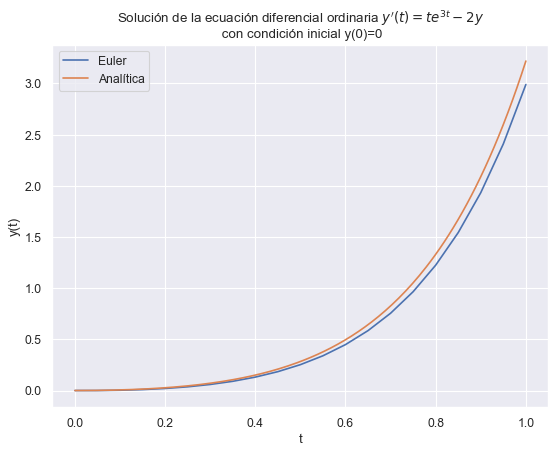

In [84]:
def solution(t):
    return 1/25*(1+(5*t-1)*np.exp(5*t))*np.exp(-2*t)
    
def f1(y,t):
    return t*np.exp(3*t)-2*y

# Resolvemos con método de Euler y graficamos
tpoints, ypoints = euler_method(f1,0,1,0.05,0)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(tpoints,ypoints,label='Euler')
taxis = np.linspace(0,1,200)
plt.plot(taxis,solution(taxis),label='Analítica')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title("Solución de la ecuación diferencial ordinaria $y'(t)=te^{3t}-2y$\n con condición inicial y(0)=0")
plt.show()

### Solución analítica de la segunda ecuación

In [85]:
t = sp.symbols('t')
y = sp.symbols('y',cls=sp.Function)
expr = sp.Eq(sp.Derivative(y(t),t),sp.cos(2*t)+sp.sin(3*t))
expr

Eq(Derivative(y(t), t), sin(3*t) + cos(2*t))

In [86]:
sp.dsolve(expr)

Eq(y(t), C1 + sin(2*t)/2 - cos(3*t)/3)

### Fijando $y(0)=1$ llegamos a $C_1=\frac{4}{3}.$

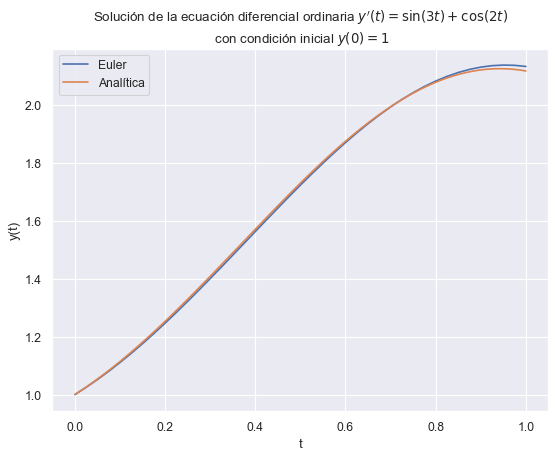

In [87]:
def solution(t):
    return 4/3+np.sin(2*t)/2-np.cos(3*t)/3
    
def f2(y,t):
    return np.cos(2*t)+np.sin(3*t)

# Resolvemos con método de Euler y graficamos
tpoints, ypoints = euler_method(f2,0,1,0.025,1)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(tpoints,ypoints,label='Euler')
taxis = np.linspace(0,1,200)
plt.plot(taxis,solution(taxis),label='Analítica')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title("Solución de la ecuación diferencial ordinaria $y'(t)=\sin(3t)+\cos(2t)$\n con condición inicial $y(0)=1$")
plt.show()

## PROBLEMA 19

### Partimos de una ecuación diferencial de la forma $\frac{dy}{dt}=f(y,t).$ El método de Euler está basado en que podemos hacer la aproximación tangente $\approx $ secante, i.e., $$y'(t)\approx\frac{y(t+h)-y(t)}{h},$$ de donde $$y(t+h)\approx y(t)+hy'(t)=y(t)+hf(y,t).$$ Si en cambio escribimos la aproximación hasta orden cuadrático $$y(t+h)\approx y(t)+hy'(t)+\frac{h^2}{2}y''(t)= y(t)+hf(y,t)+\frac{h^2}{2}\frac{df(y,t)}{dt}.$$ Esto es el método de Taylor a orden 2. Lo implementaremos:

In [88]:
def taylor2(f,df,a,b,h,y0):
    #y0 es la condicion incial
    tpoints = np.arange(a,b+1E-5,h)
    ypoints = []
    k = 1E-5
    for t in tpoints:
        ypoints.append(y0)
        # Aproximamos segunda derivada de f respecto a t con la secante
        y0 += h*f(y0,t)+h**2/2*df(y0,t)
    return tpoints, ypoints

# Una alternativa si no conocemos la derivada analítica de f
def taylor2_secante(f,a,b,h,y0):
    #y0 es la condicion incial
    tpoints = np.arange(a,b+1E-5,h)
    ypoints = []
    k = 1E-5
    for t in tpoints:
        ypoints.append(y0)
        # Aproximamos segunda derivada de f respecto a t con la secante
        y0 += h*f(y0,t)+h**2/2*(f(y0,t+k)-f(y0,t))/k
    return tpoints, ypoints

### Trabajaremos con la ecuación $$y'=1+t\sin(ty)$$ en el intervalo $0\leq t \leq 2$ con condición inicial $y(0)=0$. Identificamos $f(y,t)=1+t\sin(ty)$, cuya derivada es $\frac{df(y,t)}{dt}=ty\cos(ty)+\sin(ty)$. Tomaremos $h=0.1.$

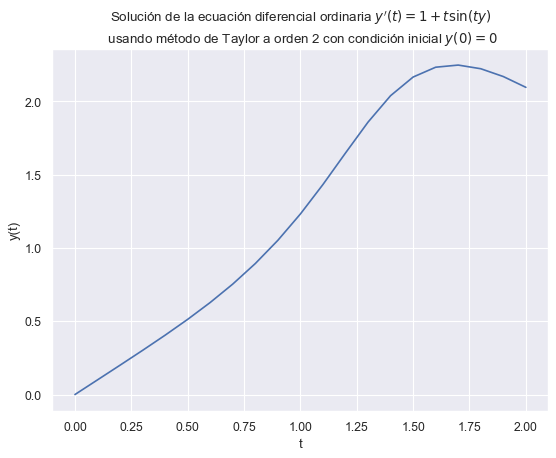

In [89]:
def f(y,t):
    return 1+t*np.sin(t*y)

def df(y,t):
    return t*y*np.cos(t*y)+np.sin(t*y)

# Resolvemos con método de Euler y graficamos
tpoints, ypoints = taylor2(f,df,0,2,0.1,0)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(tpoints,ypoints)
taxis = np.linspace(0,2,200)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Solución de la ecuación diferencial ordinaria $y'(t)=1+t\sin(ty)$\n usando método de Taylor a orden 2 con condición inicial $y(0)=0$")
plt.show()

## PROBLEMA 20

### MODIFIED EULER ó HEUN
### Recordemos que en el método de Euler se halla una solución a la ecuación $$\frac{dy}{dt}=f(y,t)$$ al considerar una expansión de Taylor a primer orden $$y(t+h)\approx y(t)+hf(y,t).$$
### Este método es fácil de implementar pero no da soluciones muy precisas a menos que tomemos un intervalo $h$ muy pequeño. Una mejora es tomar el promedio aritmético de las pendientes en $y(t)$ y $y(t+h)$, i.e., $$y(t+h)=y(t)+\frac{h}{2}(f(y(t),t)+f(y(t+h),t+h)).$$ Notamos que del lado derecho tenemos un $y(t+h)$, de manera que usamos método de Euler usual para aproximar $$y(t+h)\approx y(t)+\frac{h}{2}(f(y(t),t)+f(y(t)+hf(y,t),t+h)).$$ Escribimos el código:

In [90]:
def heun(f,a,b,h,y0):
    n = int((b - a)/h)
    t = a
    y = y0
    tsol = [t]
    ysol = [y] 
    for i in np.linspace(a,b,n+1):
        # Nota: en el markdown escribimos x(t). 
        # Aquí la nomenclatura es y(t)
        k1 = f(y,t)
        k2 = f(y+k1*h,t+h)
        # Promedio de f(x(t),t) y f(x(t)+hf(x,t),t+h)
        y += (h/2)*(k1+k2)
        t += h
        tsol.append(t)
        ysol.append(y)
    return tsol, ysol

### MIDPOINT ó RUNGE-KUTTA 2
### En este método aproximamos la solución a la ecuación $$\frac{dy}{dt}=f(y,t)$$ mediante $$y(t+h)=y(t)+hf\left(y(t)+\frac{h}{2}f(y(t),t),t+\frac{h}{2} \right).$$ El nombre del método viene del hecho de que en la fórmula de arriba, la función $f$ da la pendiente de $y$ evaluada en $t=t_n+\frac{h}{2}=\frac{t_n+t_{n+1}}{2}$, el punto medio entre $t_n$ (en el que se conoce el valor de $y(t)$)  y $t_{n+1}$ (el valor en el cual se quiere conocer $y(t)$). Ha de notarse que el primer argumento de la función en el lado derecho es $y(t)+\frac{h}{2}f(y(t),t)$, que corresponde a la aproximación (con método de Euler) de $y\left(t+\frac{h}{2} \right).$

In [91]:
def midpoint(f,a,b,h,y0):
    n = int((b - a)/h)
    t = a
    y = y0
    tsol = [t]
    ysol = [y] 
    for i in np.linspace(a,b,n+1):
        # y(t+h/2) calculado con método de euler
        yhalf = y+f(y,t)*(h/2)
        # evaluamos la función en t+h/2
        yprime = f(yhalf,t+h/2) 
        y +=  h*yprime
        t +=  h
        tsol.append(t)
        ysol.append(y)
    return tsol, ysol


### RUNGE-KUTTA 4
### Bajo la misma lógica que el método anterior, podemos hacer aproximaciones de Taylor alrededor de varios puntos y luego tomar una combinación lineal apropiada de ellas para tener una solución aún más precisa. A orden cuatro se tiene un buen balance entre alta precisión y ecuaciones que siguen siendo fáciles de programar. Explícitamente, $$k_1=f(y,t),$$ $$k_2=hf(y+k_1/2,t+h/2),$$ $$k_3=hf(y+k_2/2,t+h/2),$$ $$k_4=hf(y+k_3,t+h),$$ $$y(t+h)=y(t)+\frac{1}{6}(k_1+2k_2+2k_3+k_4).$$
### El método es preciso hasta orden $h^4.$

In [92]:
def rk4(f,a,b,h,y0):
    n = int((b - a)/h)
    t = a
    y = y0
    tsol = [t]
    ysol = [y] 
    for i in np.linspace(a,b,n+1):
        k1 = h*f(y,t)
        k2 = h*f(y+k1/2,t+h/2)
        k3 = h*f(y+k2/2,t+h/2)
        k4 = h*f(y+k3,t+h)
        y +=  1/6*(k1+2*k2+2*k3+k4)
        t +=  h
        tsol.append(t)
        ysol.append(y)
    return tsol, ysol

### Usando estos métodos vamos a resolver la ecuación $$y'=\frac{y}{t}-\left(\frac{y}{t} \right)^2$$ en el intervalo $t\in [1,2]$ con condición inicial $y(1)=1$ y $h=0.1$.


In [93]:
t = sp.symbols('t')
y = sp.symbols('y',cls=sp.Function)
expr = sp.Eq(sp.Derivative(y(t),t),y(t)/t-y(t)**2/t**2)
expr

Eq(Derivative(y(t), t), y(t)/t - y(t)**2/t**2)

In [94]:
sp.dsolve(expr)

Eq(y(t), -t/(C1 - log(t)))

### Implementando la condición inicial $y(1)=1$ tenemos $C_1=-1$, de suerte que la solución es $y(t)=\frac{t}{1+\ln(t)}.$

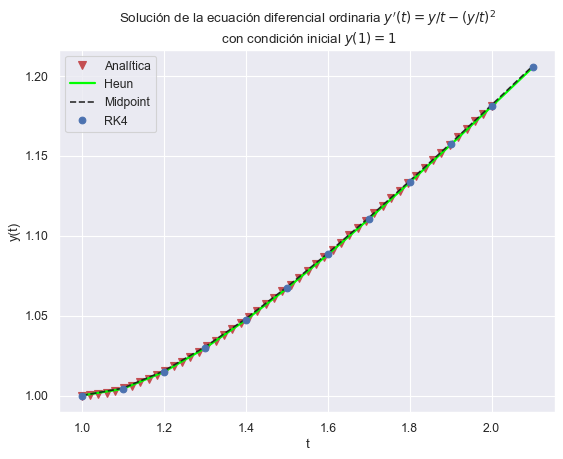

In [95]:
def solution(t):
    return t/(1+np.log(t))
    
def f1(y,t):
    return y/t-(y/t)**2

plt.figure(figsize=(8,6),dpi=80)

# Solución analítica
taxis = np.linspace(1,2,50)
plt.plot(taxis,solution(taxis),'rv',label='Analítica',markersize=7)

# Soluciones aproximadas
tpoints, ypoints = heun(f1,1,2,0.1,1)
plt.plot(tpoints,ypoints,'-',color='lime',label='Heun',linewidth=2)
tpoints, ypoints = midpoint(f1,1,2,0.1,1)
plt.plot(tpoints,ypoints,'k--',label='Midpoint',alpha=0.9)
tpoints, ypoints = rk4(f1,1,2,0.1,1)
plt.plot(tpoints,ypoints,'o',label='RK4')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title("Solución de la ecuación diferencial ordinaria $y'(t)=y/t-(y/t)^2$\n con condición inicial $y(1)=1$")
plt.show()

### Vamos a hacer lo mismo para la ecuación $$y'=-5t+5t^2+2t$$ en el intervalo $t\in [0,1]$ con condición inicial $y(0)=1/3$ y $h=0.1$.

In [96]:
t = sp.symbols('t')
y = sp.symbols('y',cls=sp.Function)
expr = sp.Eq(sp.Derivative(y(t),t),-5*t+5*t**2+2*t)
expr

Eq(Derivative(y(t), t), 5*t**2 - 3*t)

In [97]:
sp.dsolve(expr)

Eq(y(t), C1 + 5*t**3/3 - 3*t**2/2)

### Haciendo $y(0)=1/3$ tenemos $C_1=1/3$. Por tanto la solución es $y(t)=\frac{1+5t^3}{3}-\frac{3t^2}{2}$.

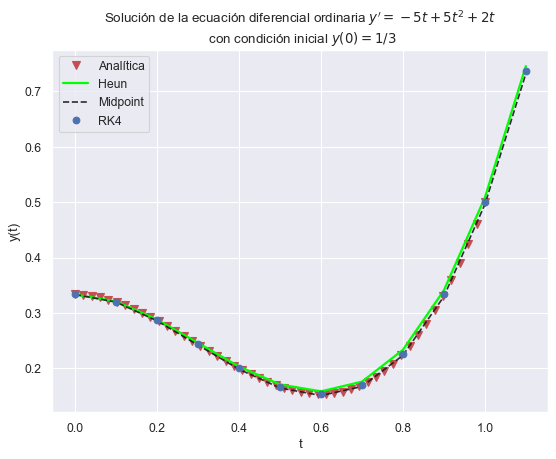

In [98]:
def solution(t):
    return (1+5*t**3)/3-3*t**2/2
    
def f2(y,t):
    return -5*t+5*t**2+2*t

plt.figure(figsize=(8,6),dpi=80)

# Solución analítica
taxis = np.linspace(0,1,50)
plt.plot(taxis,solution(taxis),'rv',label='Analítica',markersize=7)

# Soluciones aproximadas
tpoints, ypoints = heun(f2,0,1,0.1,1/3)
plt.plot(tpoints,ypoints,'-',color='lime',label='Heun',linewidth=2)
tpoints, ypoints = midpoint(f2,0,1,0.1,1/3)
plt.plot(tpoints,ypoints,'k--',label='Midpoint',alpha=0.9)
tpoints, ypoints = rk4(f2,0,1,0.1,1/3)
plt.plot(tpoints,ypoints,'o',label='RK4')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title("Solución de la ecuación diferencial ordinaria $y'=-5t+5t^2+2t$\n con condición inicial $y(0)=1/3$")
plt.show()

### Implementando la condición inicial $y(0)=1/3$ tenemos

## PROBLEMA 21

### Tenemos una ecuación diferencial ordinaria de la forma $$y'=f(y,t),\qquad y(t_0)=y_0.$$ Aproximamos el valor de $y(t)$ en valores discretos $y_i\approx y(t_i)$ con $t_i=t_0+ih$. En los métodos de Adams se utiliza la información de los $s$ pasos anteriores para calcular el siguiente valor. En particular, un método multipasos lineal utiliza combinaciones lineales de los pasos anteriores. Explícitamente, se tiene algo de la forma $$\sum_{j=0}^sa_jy_{n+j}=h\sum_{j=0}^s b_jf(y_{n+j},t_{n+j})$$ con $a_s=1$. Los coeficientes $a_0,...,a_{s-1}$ y $b_0,...,b_s$ determinan el método. Se puede distinguir entre métodos implícitos y explícitos; si $b_s=0$, el método es explícito, pues de la fórmula se puede computar directamente $y_{n+s}$, mientras que si $b_s\neq 0$, el método es implícito, pues el valor de $y_{n+s}$ depende del valor de $f(y_{n+s},t_{n+s})$. El método multipasos explícito se utiliza para predecir el valor de $y_{n+s}$. Ese valor luego se usa en la fórmula implícita para corregir el valor; el resultado es un método predictor-corrector.

### Los métodos de Adams-Bashforth son explícitos, con coeficientes $a_{s-1}=-1$ y $a_{s-2}=...=a_0=0$, mientras que los $b_j$ se elijen de manera que el método sea de orden $s$, lo cual determina el método unívocamente.

### Los métodos de Adams-Moulton son similares a los de Adams-Bashforth dado que $a_{s-1}=-1$ y $a_{s-2}=...=a_0=0$. Nuevamente los coeficientes $b_j$ se escogen para obtener el orden más alto posible. Sin embargo, los Adams-Moulton son implícitos al remover la restricción $b_s=0$, por lo que un método de Adams-Moulton de $s$ pasos puede alcanzar orden $s+1$.

In [99]:
# Adams-Bashforth (3 pasos)
def AdBash3(f,t0,tn,h,y0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    y = np.zeros(n+1)
    # con 2 pasos h=(b-a)/2
    # Se utiliza rk4 para obtener primeros valores
    _,sol = rk4(f,t0,t0+2*h,h,y0)
    y[0:3] = sol[0:3]
    # Se almacenan valores de f en variables k1 y k2
    K1 = f(y[1],t[1])
    K2 = f(y[0],t[0])
    for i in range(2,n):
        K3 = K2
        K2 = K1
        K1 = f(y[i],t[i])
        # Ver https://ibit.ly/ZdX1 para ver coeficientes de orden 3
        y[i+1] = y[i] + h/12*(23*K1-16*K2+5*K3)
    return y

#  Adams-Bashforth (3 pasos)/Moulton (4 Pasos)/Predictor-Corrector
def PreCorr3(f,t0,tn,h,y0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    y = np.zeros(n+1)
    # con 2 pasos h=(b-a)/2
    # Se utiliza rk4 para obtener primeros valores
    _,sol = rk4(f,t0,t0+2*h,h,y0)
    y[0:3] = sol[0:3]
    # Se almacenan valores de f en variables k1 y k2
    K1 = f(y[1],t[1])
    K2 = f(y[0],t[0])
    for i in range(2,n):
        K3 = K2
        K2 = K1
        K1 = f(y[i],t[i])
        # Adams-Bashforth
        # Ver https://ibit.ly/ZdX1 para ver coeficientes de orden 3
        # Hasta aquí no hay diferencia con el método anterior...
        y[i+1] = y[i] + h/12*(23*K1-16*K2+5*K3)
        #...sin embargo, conociendo y[i+1] podemos calcular f(y[i+1],t[i+1])
        # y por tanto usarlo en un método implícito para corregir
        # el valor de la estimación
        K0 = f(y[i+1],t[i+1])
        # Corrector de Adams-Moulton
        y[i+1] = y[i] + h/24*(9*K0+19*K1-5*K2+K3)
    return y

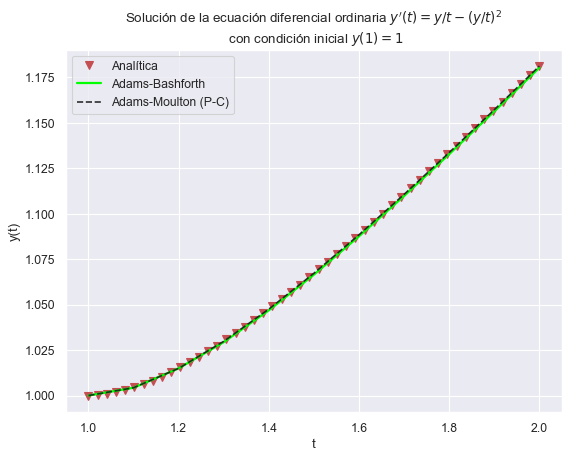

In [100]:
def f1(y,t):
    return y/t-(y/t)**2

def solution(t):
    return t/(1+np.log(t))

plt.figure(figsize=(8,6),dpi=80)

# Solución analítica
taxis = np.linspace(1,2,50)
plt.plot(taxis,solution(taxis),'rv',label='Analítica',markersize=7)

t0,tn = 1,2
h = 0.1
y0 = 1
n = int((tn-t0)/h)

tpoints = np.linspace(t0,tn,n+1)
# Soluciones aproximadas
ypoints = AdBash3(f1,t0,tn,h,y0)
plt.plot(tpoints,ypoints,'-',color='lime',label='Adams-Bashforth',linewidth=2)
ypoints = PreCorr3(f1,t0,tn,h,y0)
plt.plot(tpoints,ypoints,'k--',label='Adams-Moulton (P-C)',alpha=0.9)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title("Solución de la ecuación diferencial ordinaria $y'(t)=y/t-(y/t)^2$\n con condición inicial $y(1)=1$")
plt.show()

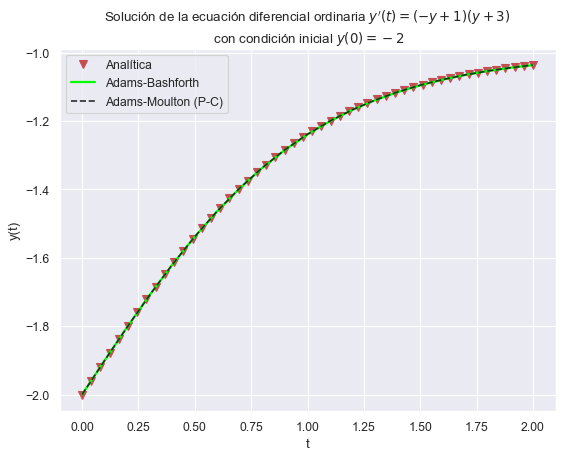

In [101]:
def f2(y,t):
    return -(y+1)*(y+3)

def solution(t):
    return -3+2/(1+np.exp(-2*t))

plt.figure(figsize=(8,6),dpi=80)

# Solución analítica
taxis = np.linspace(0,2,50)
plt.plot(taxis,solution(taxis),'rv',label='Analítica',markersize=7)

t0,tn = 0,2
h = 0.1
y0 = -2.0
n = int((tn-t0)/h)

tpoints = np.linspace(t0,tn,n+1)
# Soluciones aproximadas
ypoints = AdBash3(f2,t0,tn,h,y0)
plt.plot(tpoints,ypoints,'-',color='lime',label='Adams-Bashforth',linewidth=2)
ypoints = PreCorr3(f2,t0,tn,h,y0)
plt.plot(tpoints,ypoints,'k--',label='Adams-Moulton (P-C)',alpha=0.9)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title("Solución de la ecuación diferencial ordinaria $y'(t)=(-y+1)(y+3)$\n con condición inicial $y(0)=-2$")
plt.show()